# Depression

Depressive disorder (also known as depression) is a common mental disorder. It involves a depressed mood or loss of pleasure or interest in activities for long periods of time.

Depression is different from regular mood changes and feelings about everyday life. It can affect all aspects of life, including relationships with family, friends and community. It can result from or lead to problems at school and at work.

Depression can happen to anyone. People who have lived through abuse, severe losses or other stressful events are more likely to develop depression. **Women are more likely to have depression than men**.



# Depression Symptoms

During a depressive episode, a person experiences a depressed mood (feeling sad, irritable, empty). They may feel a loss of pleasure or interest in activities.



**Here is some symptoms of depression:**
* poor concentration
* feelings of excessive guilt or low self-worth
* hopelessness about the future
* thoughts about dying or suicide
* disrupted sleep
* changes in appetite or weight
* feeling very tired or low in energy.

Depression can cause difficulties in all aspects of life, including in the community and at home, work and school.



<!--  -->

# Import all the necessary Library

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import plotly.express as px
import plotly.graph_objects as go

!pip install -q sweetviz
import sweetviz as sv 

import warnings
warnings.filterwarnings("ignore")

<!--  -->

# Load the dataset

In [8]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [9]:
train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


# Dataset Description

The dataset contains **140,700 rows and 20 columns**, with each row representing an individual participant’s data. 


Here’s an overview of the columns:

1. id: Unique identifier for each entry.
2. Name: Name of the participant.
3. Gender: Gender of the participant.
4. Age: Age of the participant.
5. City: Participant's city of residence.
6. Working Professional or Student: Indicates if the participant is a working professional or a student.
7. Profession: Participant's profession.
8. Academic Pressure: Level of academic pressure experienced (for students).
9. Work Pressure: Level of work pressure experienced (for working professionals).
10. CGPA: Academic performance (for students).
11. Study Satisfaction: Satisfaction level with studies.
12. Job Satisfaction: Satisfaction level with job.
13. Sleep Duration: Average duration of sleep.
14. Dietary Habits: Dietary habits, e.g., Healthy, Unhealthy, Moderate.
15. Degree: Participant's highest degree.
16. Suicidal Thoughts: Indicates if the participant has ever had suicidal thoughts.
17. Work/Study Hours: Number of hours spent on work or study daily.
18. Financial Stress: Level of financial stress experienced.
19. Family History of Mental Illness: Indicates if there is a family history of mental illness.
20. Depression: Binary indicator of whether the participant experiences depression.


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

# Find the missing value

We see here, some column have lots of missing data

In [11]:
train_data.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

<!--  -->

In [12]:
train_df_update.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                                 0
CGPA                                          0
Study Satisfaction                            0
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

# Exploratory Data Analysis (EDA)

Using heatmap we see that, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction                       112803
Job Satisfaction                          

<Axes: >

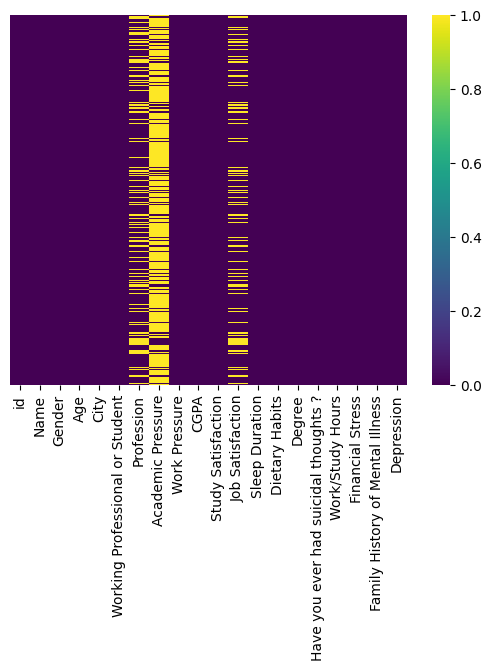

In [13]:
sns.heatmap(train_df_update.isnull(), yticklabels=False, cmap="viridis")

Text(0.5, 1.0, 'Age With Depression')

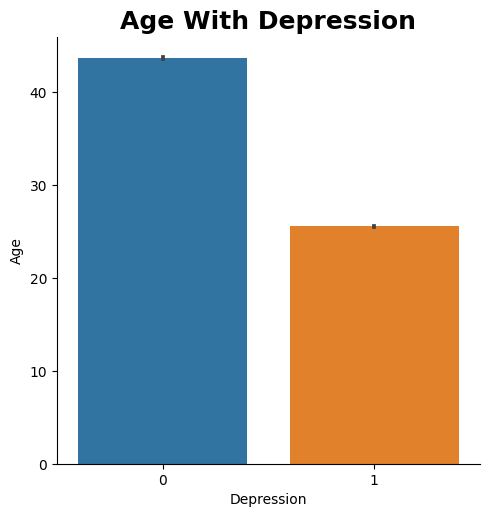

In [14]:
sns.catplot(x="Depression", y="Age", kind="bar", data = train_df_update)
plt.title('Age With Depression', fontsize=18, weight='bold')

**Age is increase and Depression is decreasing** 

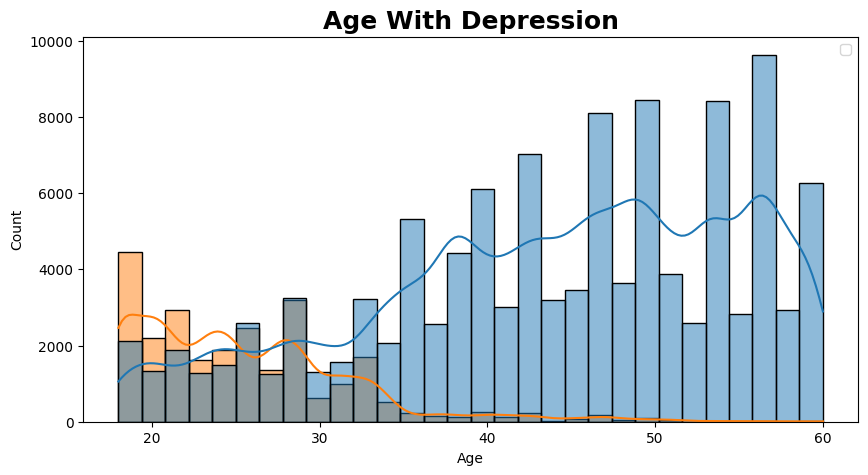

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df_update, x='Age', hue='Depression', bins=30, kde=True, alpha=0.5)
plt.title('Age With Depression', fontsize=18, weight='bold')

plt.legend()  
plt.show()

<!--  -->

**Here we see that, when work pressure is increase the depression is increase linearly**

Text(0.5, 1.0, 'Work Pressure With Depression')

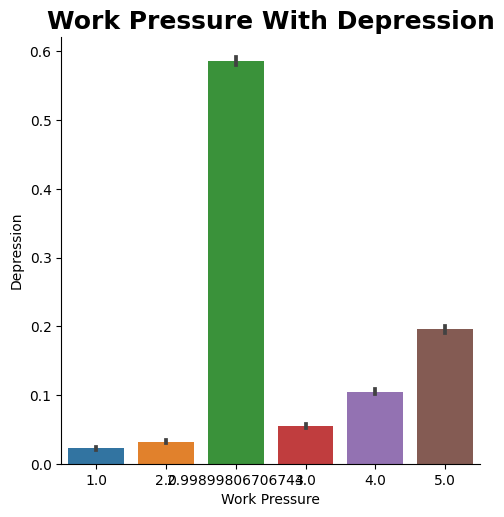

In [16]:
sns.catplot(x="Work Pressure", y="Depression", kind="bar", data = train_df_update)
plt.title('Work Pressure With Depression', fontsize=18, weight='bold')

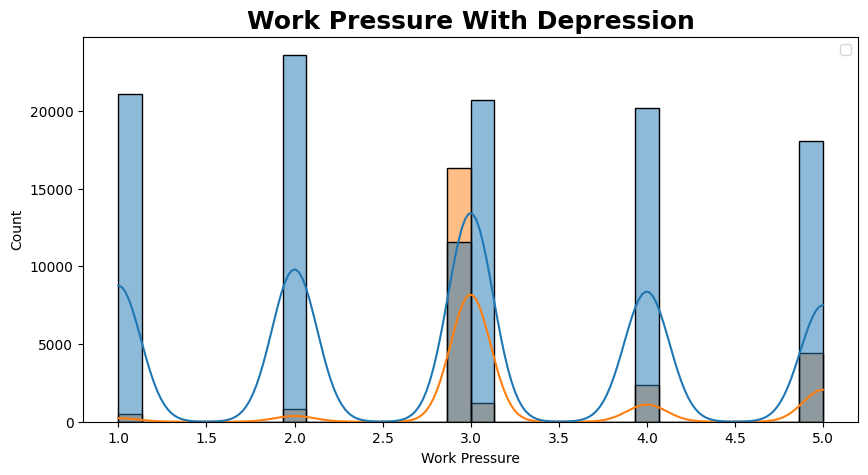

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df_update, x='Work Pressure', hue='Depression', bins=30, kde=True, alpha=0.5)
plt.title('Work Pressure With Depression', fontsize=18, weight='bold')

plt.legend()  
plt.show()

Text(0.5, 1.0, 'Work/Study Hours With Depression')

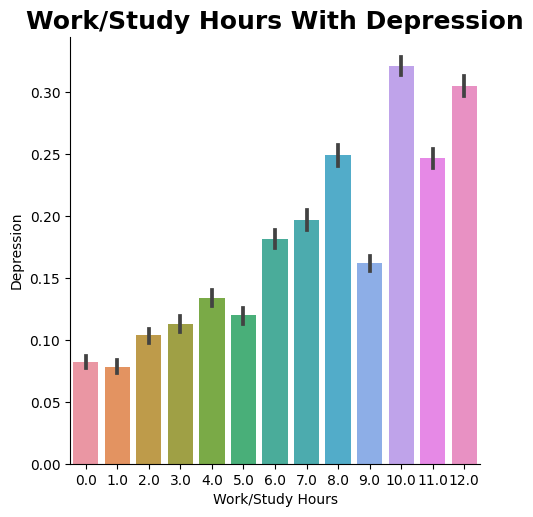

In [18]:
sns.catplot(x="Work/Study Hours", y="Depression", kind="bar", data = train_df_update)
plt.title('Work/Study Hours With Depression', fontsize=18, weight='bold')

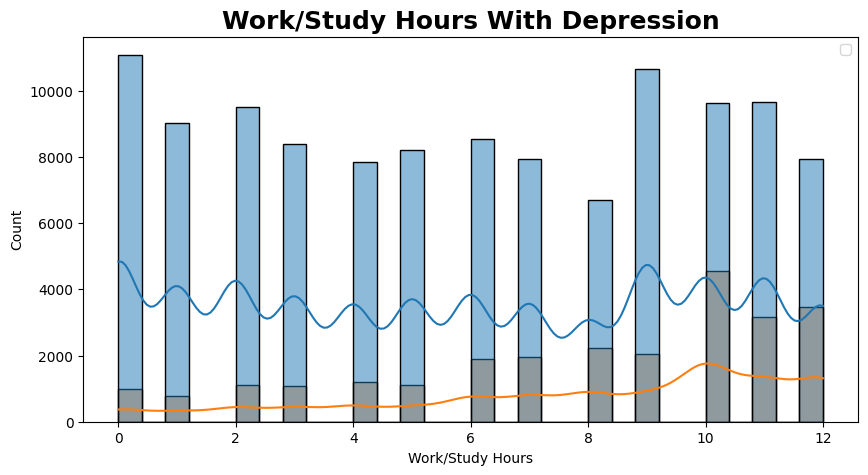

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df_update, x='Work/Study Hours', hue='Depression', bins=30, kde=True, alpha=0.5)
plt.title('Work/Study Hours With Depression', fontsize=18, weight='bold')

plt.legend()  
plt.show()

Text(0.5, 1.0, 'Work/Study Hours With Depression')

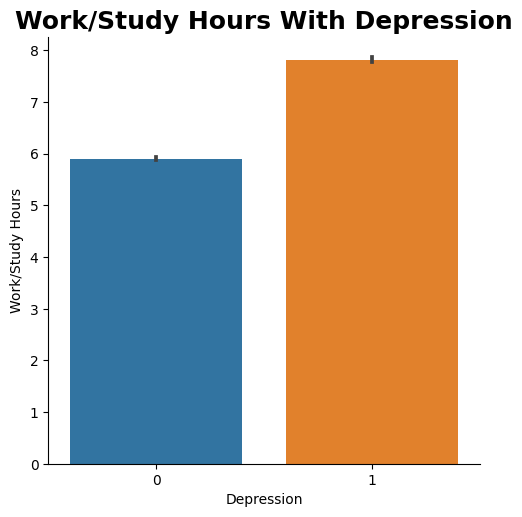

In [20]:
sns.catplot(x="Depression", y="Work/Study Hours", kind="bar", data = train_df_update)
plt.title('Work/Study Hours With Depression', fontsize=18, weight='bold')

Text(0.5, 1.0, 'Financial Stress With Depression')

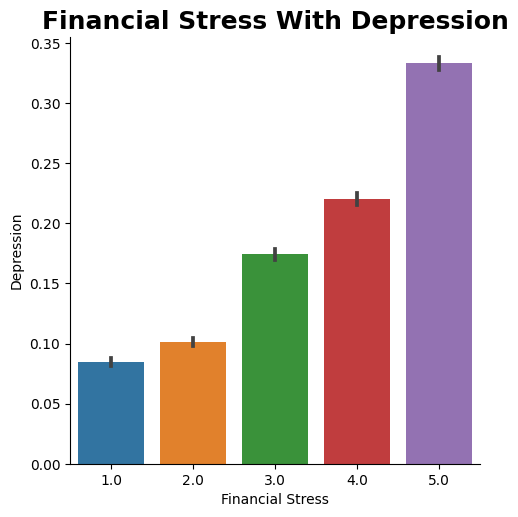

In [21]:
sns.catplot(x="Financial Stress", y="Depression", kind="bar", data = train_df_update)
plt.title('Financial Stress With Depression', fontsize=18, weight='bold')

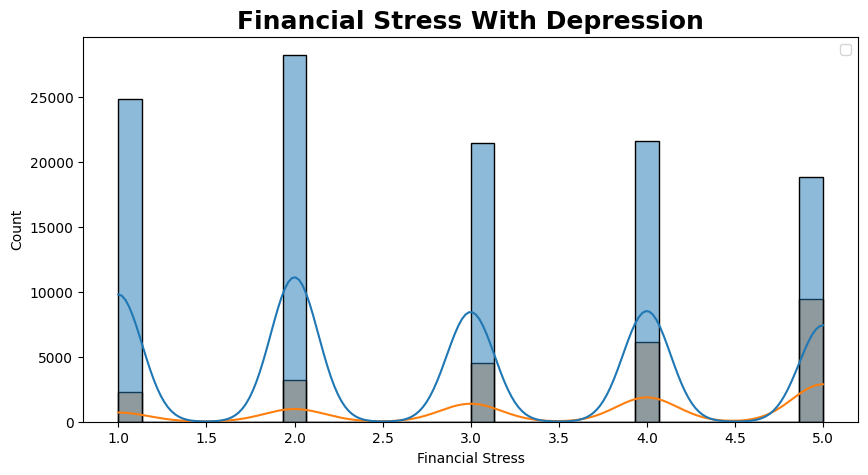

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df_update, x='Financial Stress', hue='Depression', bins=30, kde=True, alpha=0.5)
plt.title('Financial Stress With Depression', fontsize=18, weight='bold')

plt.legend()  
plt.show()

<!--  -->

# Model

In [23]:
target = 'Depression'

numerical_columns = [
    "Age", "Academic Pressure", "Work Pressure", "CGPA",
    "Study Satisfaction", "Job Satisfaction", "Work/Study Hours",
    "Financial Stress"
]

one_hot_columns = [
    "Gender", "Working Professional or Student", "City", "Family History of Mental Illness"
]

label_columns = [
    "Degree", "Profession", "Dietary Habits", "Have you ever had suicidal thoughts ?", "Sleep Duration"
]

In [24]:
import pandas as pd

class DataPreprocessor:

    def __init__(self, numerical_columns, one_hot_columns, label_columns):
        self.numerical_columns = numerical_columns
        self.one_hot_columns = one_hot_columns
        self.label_columns = label_columns

        self.scaler = StandardScaler()
        self.one_hot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
        
        self.label_encoders = {
            col: OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) for col in self.label_columns
        }

        self.one_hot_feature_names = None

    def fit(self, df):
        self.scaler.fit(df[self.numerical_columns])

        self.one_hot_encoder.fit(df[self.one_hot_columns])
        self.one_hot_feature_names = self.one_hot_encoder.get_feature_names_out(self.one_hot_columns)

        for col in self.label_columns:
            self.label_encoders[col].fit(df[[col]])

    def transform(self, df):
        df_scaled = df.copy()

        df_scaled[self.numerical_columns] = self.scaler.transform(df[self.numerical_columns])

        encoded_columns = self.one_hot_encoder.transform(df[self.one_hot_columns])
        encoded_df = pd.DataFrame(encoded_columns, columns=self.one_hot_feature_names, index=df.index)

        for col in self.label_columns:
            df_scaled[col] = self.label_encoders[col].transform(df[[col]])

        df_final = pd.concat([df_scaled.drop(self.one_hot_columns, axis=1), encoded_df], axis=1)

        return df_final

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)


In [25]:
train_df_update = train_df_update.drop('id', axis=1)
train_df_update = train_df_update.drop('Name', axis=1)

train_df_update[one_hot_columns + label_columns] = train_df_update[one_hot_columns + label_columns].fillna('None')
train_df_update[numerical_columns] = train_df_update[numerical_columns].fillna(-1)

preprocessor = DataPreprocessor(numerical_columns, one_hot_columns, label_columns)

preprocessor.fit(train_df_update)

train_df_update = preprocessor.transform(train_df_update)
test_data = preprocessor.transform(test_data)

In [26]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier

In [27]:
x = train_df_update.drop(target, axis=1)
y = train_df_update[target]

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgb_model = LGBMClassifier()
cat_model = CatBoostClassifier(verbose=0)

In [28]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

oof_preds_xgb = np.zeros(len(train_df_update))
oof_preds_lgb = np.zeros(len(train_df_update))
oof_preds_cat = np.zeros(len(train_df_update))
oof_preds_avg = np.zeros(len(train_df_update))

for train_index, valid_index in k_fold.split(x):
    x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    xgb_model.fit(x_train, y_train)
    lgb_model.fit(x_train, y_train)
    cat_model.fit(x_train, y_train)

    xgb_preds = xgb_model.predict_proba(x_valid)[:, 1]
    lgb_preds = lgb_model.predict_proba(x_valid)[:, 1]
    cat_preds = cat_model.predict_proba(x_valid)[:, 1]
    
    oof_preds_xgb[valid_index] = xgb_preds
    oof_preds_lgb[valid_index] = lgb_preds
    oof_preds_cat[valid_index] = cat_preds
    
    preds_avg = (xgb_preds + lgb_preds + cat_preds) / 3
    oof_preds_avg[valid_index] = preds_avg

score_xgb = roc_auc_score(y, oof_preds_xgb)
score_lgb = roc_auc_score(y, oof_preds_lgb)
score_cat = roc_auc_score(y, oof_preds_cat)
score_avg = roc_auc_score(y, oof_preds_avg)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20375, number of negative: 92185
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info

In [29]:
print(f'ROC AUC XGBoost: {score_xgb:.5f}')
print(f'ROC AUC LightGBM: {score_lgb:.5f}')
print(f'ROC AUC CatBoost: {score_cat:.5f}')
print(f'ROC AUC Average: {score_avg:.5f}')

ROC AUC XGBoost: 0.97366
ROC AUC LightGBM: 0.97446
ROC AUC CatBoost: 0.97497
ROC AUC Average: 0.97513


# Submission

In [30]:
total_score = score_xgb + score_lgb + score_cat

weight_xgb = score_xgb / total_score
weight_lgb = score_lgb / total_score
weight_cat = score_cat / total_score

x_test = test_data.drop(columns=['id', 'Name'])

xgb_preds = xgb_model.predict_proba(x_test)[:, 1]
lgb_preds = lgb_model.predict_proba(x_test)[:, 1]
cat_preds = cat_model.predict_proba(x_test)[:, 1]

preds_avg = (xgb_preds * weight_xgb + lgb_preds * weight_lgb + cat_preds * weight_cat)
preds_avg = (preds_avg >= 0.5).astype(int)

submit = pd.DataFrame({
    'id': test_data['id'],
    'prediction': preds_avg.flatten()
})


submit.to_csv("../working/sub_mission.csv", index=False)

print(submit)
print(submit['prediction'].describe())


           id  prediction
0      140700           0
1      140701           0
2      140702           0
3      140703           1
4      140704           0
...       ...         ...
93795  234495           0
93796  234496           1
93797  234497           0
93798  234498           1
93799  234499           0

[93800 rows x 2 columns]
count    93800.000000
mean         0.201919
std          0.401434
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: prediction, dtype: float64
